<a href="https://colab.research.google.com/github/ljs2021/Machine-Learning-Book-/blob/master/10%E1%84%8C%E1%85%AE%E1%84%8E%E1%85%A1_linear_regression_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 회귀 트리

> 회귀함수를 기반하지 않고 트리를 기반으로 하는 회귀방식.


In [ ]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

#보스턴 데이터 세트 로드
boston = load_boston()
boston_df = pd.DataFrame(boston.data,columns=boston.feature_names)

boston_df['PRICE'] = boston.target
y_target = boston_df['PRICE']
X_data = boston_df.drop(['PRICE'],axis=1,inplace=False)

rf =RandomForestRegressor(random_state=0,n_estimators=1000)
neg_mse_scores = cross_val_score(rf,X_data,y_target,scoring='neg_mean_squared_error',cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_scores = np.mean(rmse_scores)

print("5 교차 검증의 개별 Negatice MSE score", np.round(neg_mse_scores,2))
print("5 교차 검증의 RMSE scores : ",np.round(rmse_scores,2))
print("5 교차 검증의 평균 RMSE:{:.3f}".format(avg_scores))

5 교차 검증의 개별 Negatice MSE score [ -7.93 -13.06 -20.53 -46.31 -18.8 ]
5 교차 검증의 RMSE scores :  [2.82 3.61 4.53 6.8  4.34]
5 교차 검증의 평균 RMSE:4.420


### 입력모델과 데이터 세트를 입력 받아 교차 검증으로 평균 RMSE를 계산해주는 함수.

In [ ]:
def get_model_cv_prediction(model,X_data,y_target):
    neg_mse_scores = cross_val_score(model,X_data,y_target,scoring="neg_mean_squared_error",cv=5)
    rmse_scores = np.sqrt(-1*neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print("#####",model.__class__.__name__,"#####")
    print("5 교차 검증의 평균 RMSE : {:.3f}".format(avg_rmse))

### 주택 가격 예측

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=777,max_depth=4)
rf_reg = RandomForestRegressor(random_state=777,n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=777,n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

#트리 기반의 회귀 모델을 반복하면서 평가 수행.
models = [dt_reg,rf_reg,gb_reg,xgb_reg,lgb_reg]
for model in models:
    get_model_cv_prediction(model,X_data,y_target)

##### DecisionTreeRegressor #####
5 교차 검증의 평균 RMSE : 5.947
##### RandomForestRegressor #####
5 교차 검증의 평균 RMSE : 4.437
##### GradientBoostingRegressor #####
5 교차 검증의 평균 RMSE : 4.231
[16:34:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:34:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:34:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:34:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:34:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
##### XGBRegressor #####
5 교차 검증의 평균 RMSE : 4.089
##### LGBMRegressor #####
5 교차 검증의 평균 RMSE : 4.646


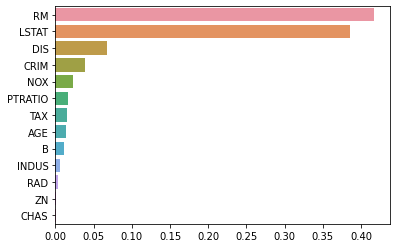

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt

%matplotlib inline 

rf_reg = RandomForestRegressor(n_estimators=1000)

#앞 예제에서 만들어지 X_data, y_target 데이터 세트를 적용해 학습.
rf_reg.fit(X_data,y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_,index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series,y=feature_series.index)

### 보스턴 데이터 세트의 개수를 100개만 샘플링하고 RM,PRICE변수만 추출 후 시각화.

(100, 2)


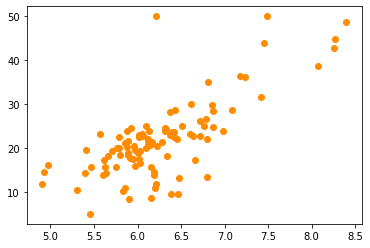

In [ ]:
boston_df_sample = boston_df[['RM','PRICE']]
boston_df_sample = boston_df_sample.sample(n=100,random_state=777)
print(boston_df_sample.shape)
plt.figure()
plt.scatter(boston_df_sample['RM'],boston_df_sample['PRICE'],c='darkorange')

#### LinearRegression , DecisionTreeRegression을 max_depth를 2,7으로 학습 후 RM값을 4.5~8.5까지 100개의 데이터 세트로 제공했을 때 예측.

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

#선형 회귀와 결정 트리 기반의 Regressor 생성. 
lr_reg = LinearRegression()
rf_reg2 = RandomForestRegressor(max_depth=2)
rf_reg7 = RandomForestRegressor(max_depth=7)

#실제 예측을 적용할 테스트용 데이터 세트를 4.5~8.5까지 100개의 데이터 세트로 생성.
X_test = np.arange(4.5,8.5,0.04).reshape(-1,1)

#보스턴 주택 가격 데이터에서 시각화를 위해 피처는 RM만 그리고 결정 데이터인 PRICE 추출.
X_feature = boston_df_sample['RM'].values.reshape(-1,1)
y_target = boston_df_sample['PRICE'].values.reshape(-1,1)

#학습 예측 
lr_reg.fit(X_feature,y_target)
rf_reg2.fit(X_feature,y_target)
rf_reg7.fit(X_feature,y_target)

pred_lr=lr_reg.predict(X_test)
pred_rf2=rf_reg2.predict(X_test)
pred_rf7=rf_reg7.predict(X_test)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


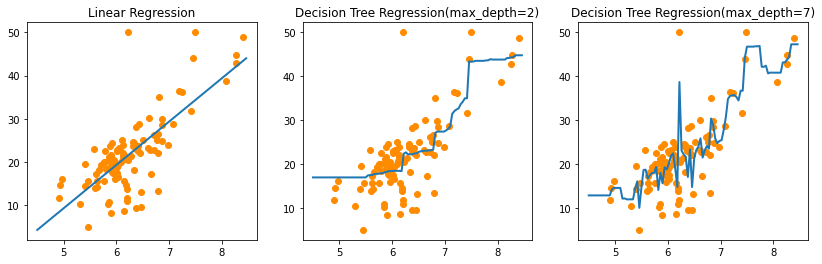

In [ ]:
fig, (ax1,ax2,ax7) = plt.subplots(figsize=(14,4),ncols=3)

#X축 값을 4.5~8.5로 변환하며 입력했을 대 선형회귀와 결정 트리 회귀 예측선 시각화.
#선형 회귀로 학습된 모델 회귀 예측선.
ax1.set_title("Linear Regression")
ax1.scatter(boston_df_sample['RM'],boston_df_sample['PRICE'],c='darkorange')
ax1.plot(X_test,pred_lr,label='linear',linewidth=2)

ax2.set_title("Decision Tree Regression(max_depth=2)")
ax2.scatter(boston_df_sample['RM'],boston_df_sample['PRICE'],c='darkorange')
ax2.plot(X_test,pred_rf2,label='linear',linewidth=2)

ax7.set_title("Decision Tree Regression(max_depth=7)")
ax7.scatter(boston_df_sample['RM'],boston_df_sample['PRICE'],c='darkorange')
ax7.plot(X_test,pred_rf7,label='linear',linewidth=2)

## 회귀 실습 - 자전거 대여 수요 예측 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

bike_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/bike_train.csv")
print(bike_df.shape)
bike_df.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
#문자열을 datetime 타입으로 변환. 
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)

#datetime에서 년,월,일 시간 추출.
bike_df['year'] = bike_df.datetime.apply(lambda x : x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x : x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x : x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x : x.hour)
bike_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2


In [8]:
drop_columns = ['datetime','casual','registered']
bike_df.drop(drop_columns,axis=1,inplace=True)

### 성능평가 방벙 : RMSLE  > 사이킷런에서 지원하지 않아 직접 만듦

In [13]:
from sklearn.metrics import mean_squared_error , mean_absolute_error

#log 값 변환 시 NaN등의 이슈로 log()가 아닌 log1p()를 이용해 RMSLE를 계산.
def rmsle(y,pred):
  log_y = np.log1p(y)
  log_pred = np.log1p(pred)
  squared_error = (log_y - log_pred)**2
  rmsle = np.sqrt(np.mean(squared_error))

  return rmsle

#사이킷런의 means_squared_error를 사용해 RMSE 계산.
def rmse(y,pred):

  return np.sqrt(mean_squared_error(y,pred))


#MSE , RMSE , RMSLE모두 계산.
def evaluate_regr(y,pred):
  rmsle_val = rmsle(y,pred)
  rmse_val = rmse(y,pred)
  #MSE는 사이킷런 mean_absolute_error로 계산.
  mse_val = mean_absolute_error(y,pred)
  print("RMSLE :{:.3f}, RMSE : {:.3f}, MSE : {:.3f}".format(rmsle_val,rmse_val,mse_val))

### 로그 변환, 피처 인코딩과 모델 학습/예측/평가

In [14]:
#LinearRegression 이용해 회귀 예측.

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression

y_target = bike_df['count']
X_features = bike_df.drop('count',axis=1,inplace=False)

X_train,X_test,y_train,y_test = train_test_split(X_features,y_target,test_size=0.3,random_state=777)

lr_reg = LinearRegression()
lr_reg.fit(X_train,y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test,pred)

RMSLE :1.157, RMSE : 143.207, MSE : 106.334


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log1p
  


In [15]:
def get_top_error_data(y_test,pred,n_tops=5):
  #DateFrame의 칼럼으로 실제 대여 회수(count)와 예측값을 서로 비교할 수 있도록 생성.
  result_df = pd.DataFrame(y_test.values,columns=['real_count'])
  result_df['predicted_count'] = np.round(pred)
  result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])

  #예측값과 실제 값이 가장 큰 데이터 순으로 출력.
  print(result_df.sort_values('diff',ascending=False)[:n_tops])

get_top_error_data(y_test,pred,n_tops=5)

      real_count  predicted_count   diff
377          817            169.0  648.0
715          890            322.0  568.0
2073         884            322.0  562.0
2205         745            190.0  555.0
1125         797            244.0  553.0


회귀에서 이렇게 큰 예측 오류가 발생할 경우 가장 먼저 살펴볼 것은 Target값의 분포가 왜곡된 형태를 이루고 있는지 확인.

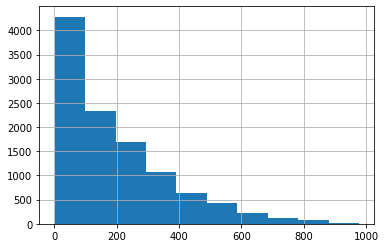

In [16]:
y_target.hist()

해결책 : 로그변환.

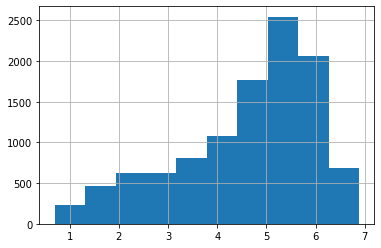

In [17]:
y_log_transform = np.log1p(y_target)
y_log_transform.hist()

In [18]:
y_target_log = np.log1p(y_target)

X_train,X_test,y_train,y_test = train_test_split(X_features,y_target_log,test_size=0.3,random_state=777)

lr_reg = LinearRegression()
lr_reg.fit(X_train,y_train)
pred = lr_reg.predict(X_test)

y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp,pred_exp)

RMSLE :1.011, RMSE : 162.942, MSE : 108.269


RMSLE 오류는 줄어들었지만 RMSE가 오히려 늘어났다. 그이유 ?

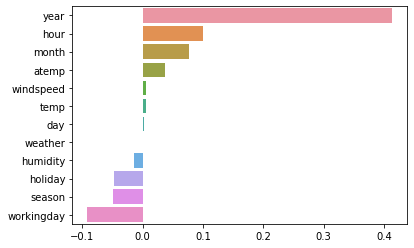

In [20]:
#각 피처의 회귀 계수값 시각화.
coef = pd.Series(lr_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values,y=coef_sort.index)

year 피처의 회귀 계수값이 독보적으로 큰 값을 가진다. 

> year에 따라 자전거 대여 횟수가 크게 영향? 납득 어렵다. 

> 이유 : 카테고리형 피처지만 숫자형 값으로 돼 있다.(2011,2012) 사이킷런은 카테고리만을 위한 데이터 타입이 없으며,모두 숫자로 반환해야한다. 

> 이처럼 숫자형 카테고리 값을 선형회귀에 사용할 경우 회귀계수를 연산할때 이 숫자형 값에 크게 영향을 받는 경우가 발생할 수 있다. 따라서 one-hot-encoding이 필요하다.

In [24]:
# 원-핫 인코딩이 적용된 feature 데이터 세트 기반으로 학습/예측 데이터 분할. 
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log,
                                                    test_size=0.3, random_state=0)

# 모델과 학습/테스트 데이터 셋을 입력하면 성능 평가 수치를 반환
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)
# end of function get_model_predict    

# model 별로 평가 수행
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model,X_train, X_test, y_train, y_test,is_expm1=True)

### LinearRegression ###
RMSLE :0.589, RMSE : 97.483, MSE : 63.106
### Ridge ###
RMSLE :0.589, RMSE : 98.407, MSE : 63.648
### Lasso ###
RMSLE :0.634, RMSE : 113.031, MSE : 72.658


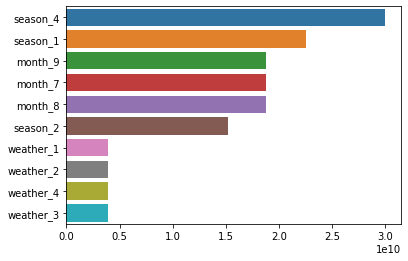

In [26]:
coef = pd.Series(lr_reg.coef_,index=X_features_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:10]
sns.barplot(x=coef_sort.values,y=coef_sort.index)

In [28]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


# 랜덤 포레스트, GBM, XGBoost, LightGBM model 별로 평가 수행
rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
    get_model_predict(model,X_train, X_test, y_train, y_test,is_expm1=True)

### RandomForestRegressor ###
RMSLE :0.354, RMSE : 50.899, MSE : 31.504
### GradientBoostingRegressor ###
RMSLE :0.340, RMSE : 55.742, MSE : 34.315
[12:38:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
### XGBRegressor ###
RMSLE :0.346, RMSE : 56.474, MSE : 34.917
### LGBMRegressor ###
RMSLE :0.316, RMSE : 46.473, MSE : 28.777
